In [55]:
import networkx as nx
import random as rd
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Random Surfer Simulation

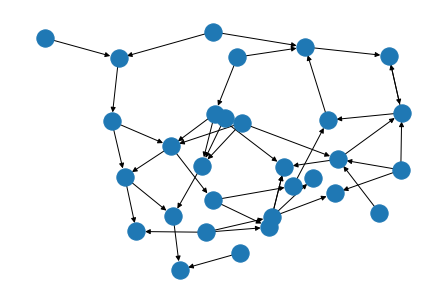

In [9]:
g = nx.erdos_renyi_graph(30, 0.05, directed=True, seed=123)
nx.draw(g, pos=nx.kamada_kawai_layout(g))

In [47]:
pageranked = nx.pagerank(g)
lst_real_rank = []
for i in range(30):
    lst_real_rank.append(pageranked[i])
lst_real_rank

[0.01321914850756847,
 0.04305614905051307,
 0.0224184422385673,
 0.020763573555365067,
 0.1519409000092644,
 0.015278038556628357,
 0.04357199076624549,
 0.08868962006965002,
 0.009276594051426114,
 0.027215223573378695,
 0.009276594051426114,
 0.009276594051426114,
 0.009276594051426114,
 0.021104257419853185,
 0.023535500084085954,
 0.009276594051426114,
 0.018135203917936826,
 0.009276594051426114,
 0.01264966891920012,
 0.05375946044542632,
 0.009276594051426114,
 0.011904963688854351,
 0.15057445865003966,
 0.02084377195458973,
 0.025679331302227965,
 0.02721686924658904,
 0.0925438315518033,
 0.009276594051426114,
 0.009276594051426114,
 0.03241025002937753]

In [24]:
lst_rank = [0 for i in range(30)]
lst_nodes = [i for i in range(30)]

In [88]:
lst_rank[0] += 1 #default start at node 0
pos = 0 #start at node 0
trials = 1000
lst_differences = [[] for i in range(30)]
for i in range(trials):
    lst_neighbors = [i for i in g.neighbors(pos)]
    prob = rd.random()
    if prob <= 0.85: #alpha
        if lst_neighbors == []: #no neighbors
            chosen_node = np.random.choice(lst_nodes)
            lst_rank[chosen_node] +=1 
            pos = chosen_node
        else: #has neighbors:
            chosen_node = np.random.choice(lst_neighbors)
            lst_rank[chosen_node] +=1
            pos = chosen_node
    else: #simply to a random node:
        chosen_node = np.random.choice(lst_nodes)
        lst_rank[chosen_node] +=1 
        pos = chosen_node
    for j in range(30):
        lst_differences[j].append(lst_rank[j]/(i+1) - lst_real_rank[j])

## Task 2: Visualize

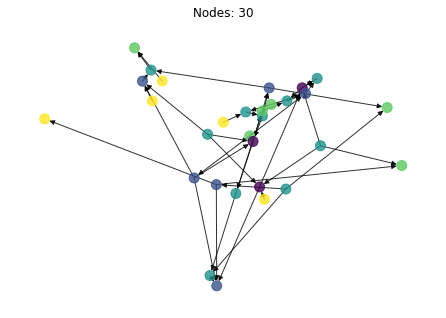

In [95]:
#Visualize with color
plt.clf()
# Plot network layout, color coding nodes by their degree
degree = np.array([g.degree[i] for i in g.nodes])
nx.draw(g, pos=nx.spring_layout(g), node_color=-degree, node_size = 100, alpha=0.8)
plt.title('Nodes: ' + str(len(degree)))
plt.show()

## Task 3: Graphing errors

In [89]:
for i in range(len(lst_rank)):
    lst_rank[i] /= trials

In [91]:
x_axis = np.linspace(0, trials, trials)

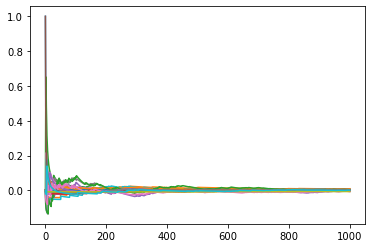

In [92]:
plt.figure()
for i in lst_differences:
    plt.plot(x_axis, i) #we see differences converge to around 0